# Feature relevance

In [4]:
%load_ext autoreload
%autoreload

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer, StandardScaler

sys.path.append("../../utils")
from utils import feature_selection, fs_driver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gt = pd.read_csv('../../../dumps/various_sizes/16K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

clf = LinearSVC(C=0.1, max_iter=10000,random_state=0)
clf.fit(data_train, target_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

Text(0, 0.5, 'Coefficient index')

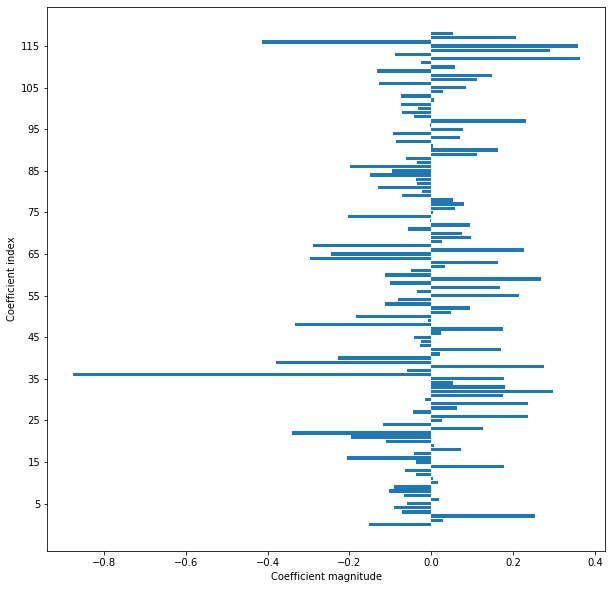

In [3]:
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(range(n_features), clf.coef_[0], align='center') 
plt.yticks(np.arange(5,125,10), np.arange(5,125,10)) 
plt.xlabel("Coefficient magnitude")
plt.ylabel("Coefficient index")

See LinearRegression in order to understand which processus we follow to generate the values.

Let's also test with the bigger dataset of 16k samples.

In [5]:
feature_selection('../../../dumps/various_sizes/16K.csv','svc')

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.9901      0.989713     1.29346           0
K best features             115  ['f1','f2','f3',                 0.990334    0.989713     1.30238           1.29515
                                 'f4','f5','f6',
                                 'f7','f8','f9',
                                 'f10','f11','f13',
                                 'f14','f15','f16',
                                 'f17','f18','f19',
                                 'f20','f21','f22',
                                 'f23','f24','f25',
                                 'f26','f27','f28',
                                 'f29','f30','f31',
                                 'f32','f33','f34',
                        

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[['K best features',
  array(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
         'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
         'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
         'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
         'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48',
         'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57',
         'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66',
         'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f75', 'f76',
         'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85',
         'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f93', 'f94', 'f95',
         'f96', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104',
         'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112',
         'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119'],
        dtype=object),
  29.172087140328646],

The conclusions are the same as the ones we infered from the previous regression except that here we reduced the number of features to 10 instead of 8.

In [6]:
fs_driver('../../../dumps/various_sizes/16K.csv','svc',[0.005,0.01,0.05,0.1,0.2,0.4,0.8])

Threshold : 0.005000
Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.9901      0.989713     8.56109           0
K best features             115  ['f1','f2','f3',                 0.990412    0.989713     7.83513           7.93274
                                 'f4','f5','f6',
                                 'f7','f8','f9',
                                 'f10','f11','f12',
                                 'f13','f14','f15',
                                 'f16','f17','f18',
                                 'f19','f20','f21',
                                 'f22','f23','f24',
                                 'f25','f26','f27',
                                 'f28','f29','f30',
                                 'f31','f32','f33',
   

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                  0.9901    0.989713    8.33293             0
K best features              84  ['f1','f3','f4',                   0.9901    0.990025    3.58805             7.7569
                                 'f5','f6','f8',
                                 'f9','f10','f14',
                                 'f15','f17','f19',
                                 'f21','f22','f23',
                                 'f24','f25','f27',
                                 'f29','f30','f32',
                                 'f33','f34','f35',
                                 'f36','f37','f38',
                                 'f39','f40','f41',
                                 'f43','f48','f49',
                     

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


Execution          # features  Features selected      Training set acc    Test acc    Time (s)    Fixed cost (s)
---------------  ------------  -------------------  ------------------  ----------  ----------  ----------------
Classic                   119  ['f1',...,'f119']              0.9901      0.989713    8.88827            0
K best features             1  ['f37']                        0.880418    0.877805    0.231434           8.36146




/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


[['K best features',
  array(['f1', 'f3', 'f9', 'f15', 'f17', 'f21', 'f22', 'f23', 'f24', 'f25',
         'f27', 'f30', 'f32', 'f33', 'f34', 'f36', 'f37', 'f39', 'f40',
         'f41', 'f43', 'f48', 'f49', 'f51', 'f54', 'f56', 'f58', 'f59',
         'f60', 'f61', 'f64', 'f65', 'f66', 'f67', 'f68', 'f75', 'f82',
         'f85', 'f87', 'f90', 'f91', 'f98', 'f107', 'f108', 'f109', 'f110',
         'f113', 'f115', 'f116', 'f117', 'f118'], dtype=object),
  362.5034016919915],
 ['Iterative process',
  ['f1',
   'f3',
   'f4',
   'f5',
   'f7',
   'f8',
   'f9',
   'f10',
   'f11',
   'f14',
   'f15',
   'f19',
   'f21',
   'f23',
   'f24',
   'f25',
   'f26',
   'f27',
   'f28',
   'f29',
   'f30',
   'f31',
   'f33',
   'f34',
   'f36',
   'f37',
   'f38',
   'f39',
   'f41',
   'f42',
   'f43',
   'f46',
   'f47',
   'f48',
   'f49',
   'f51',
   'f52',
   'f53',
   'f54',
   'f55',
   'f56',
   'f58',
   'f59',
   'f60',
   'f61',
   'f64',
   'f65',
   'f66',
   'f67',
   'f68',
   'f70'

OVERALL CONCLUSION : no convergence + time explosion for feature extraction + loss of precision + inconsistency when we get better results with less features from iterative process compared to K best.